In [8]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
info_film = pd.read_csv('film.txt', sep=';')
info_film['Actors'] = info_film['Actor'].str.cat(info_film['Actress'], sep =",")
del info_film['Actor']
del info_film['Actress']
info_film.columns = ['Year', 'Viewing time', 'Name of film', 'Genre', 'Regisseur', 'Rating', 'Awards', 'Actors']
print(info_film.shape)
info_film.head(20)

(1659, 8)


,Year,Viewing time,Name of film,Genre,Regisseur,Rating,Awards,Actors
0,1990,111.0,Tie Me Up! Tie Me Down!,Comedy,"Almodуvar, Pedro",68.0,No,"Banderas, Antonio,Abril, Victoria"
1,1991,113.0,High Heels,Comedy,"Almodуvar, Pedro",68.0,No,"Bosй, Miguel,Abril, Victoria"
2,1983,104.0,"Dead Zone, The",Horror,"Cronenberg, David",79.0,No,"Walken, Christopher,Adams, Brooke"
3,1979,122.0,Cuba,Action,"Lester, Richard",6.0,No,"Connery, Sean,Adams, Brooke"
4,1978,94.0,Days of Heaven,Drama,"Malick, Terrence",14.0,No,"Gere, Richard,Adams, Brooke"
5,1983,140.0,Octopussy,Action,"Glen, John",68.0,No,"Moore, Roger,Adams, Maud"
6,1984,101.0,Target Eagle,Action,"Loma, Josй Antonio de la",14.0,No,"Connors, Chuck,Adams, Maud"
7,1989,99.0,"American Angels: Baptism of Blood, The",Drama,"Sebastian, Beverly",28.0,No,"Bergen, Robert D.,Adams, Trudy"
8,1985,104.0,Subway,Drama,"Besson, Luc",6.0,No,"Lambert, Christopher,Adjani, Isabelle"
9,1990,149.0,Camille Claudel,Drama,"Nuytten, Bruno",32.0,No,"Depardieu, Gйrard,Adjani, Isabelle"


Для начала построим столбчатую диаграмму распределения выхода фильмов с течением времени. Это можно сделать при помощи простой функции plot.

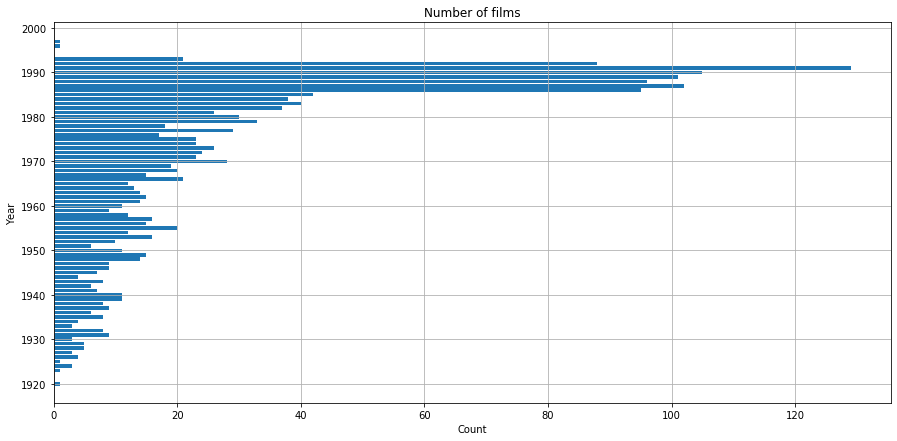

In [74]:
interest = info_film[['Year','Name of film']].groupby('Year').count().reset_index()
plt.barh(interest['Year'], interest['Name of film'])
plt.xlabel('Count')
plt.ylabel('Year')
plt.title('Number of films')
plt.grid()

А также какие жанры фильмов собрали наибольшее количество наград.

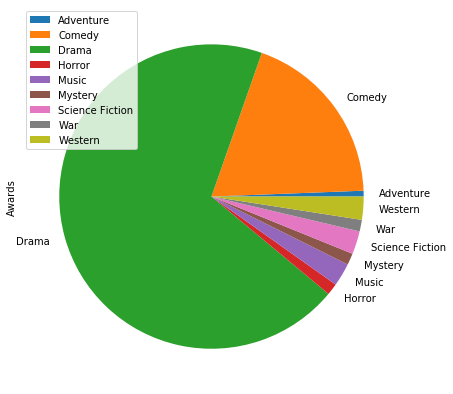

In [10]:
share = info_film[['Genre','Awards']]
shares = share[ share.Awards == 'Yes' ].groupby('Genre').count()
shares.plot(kind='pie', y='Awards')

Как видно на графиках, за отведённый период времени наибольший интерес у людей среди всех жанров приобрели драмы. Так как не всем может быть очевидно почему, стоит изучить эти данные более подробно. Для более быстрой и удобной визуализации корреляции сразу нескольких величин лучше использовать библиотеку seaborn.  

In [3]:
import seaborn as sns

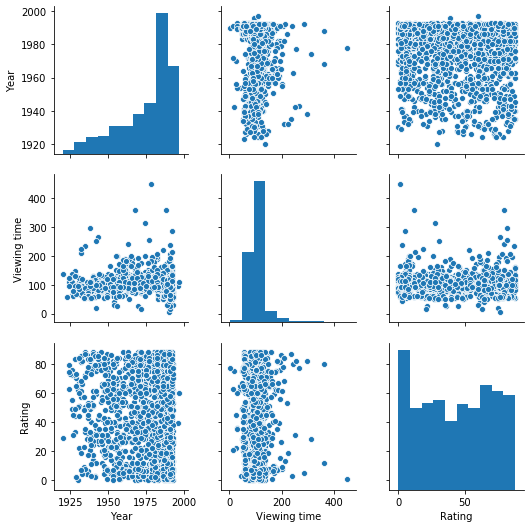

In [208]:
sns_plot = sns.pairplot(
    info_film[['Year', 'Viewing time', 'Rating']])
sns_plot

Эта библиотека также позволяет более подробно изучать признаки различных данных. Например, как изменится длительность просмотра фильмов с течением времени.

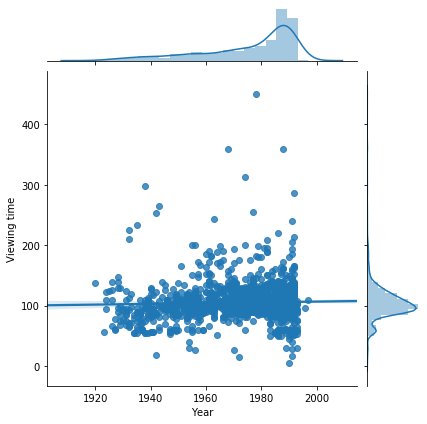

In [90]:
sns.jointplot(x='Year', y='Viewing time', 
              data=info_film, kind='reg')

Сравним оценки фильмов в зависимости от их жанра при помощи boxplot. Сделаем это с помощью библиотеки plotly, так как она позволяет построить наиболее понятные ящики для глаза и посмотреть точное численное значение. 

In [4]:
from plotly.offline import init_notebook_mode, iplot
import plotly

import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [198]:
rate = info_film[['Genre','Rating']]
rate.head()

,Genre,Rating
0,Comedy,68.0
1,Comedy,68.0
2,Horror,79.0
3,Action,6.0
4,Drama,14.0


In [199]:
data_rate = []

for genre in rate['Genre'].unique():
    data_rate.append(
        go.Box(y=rate[rate.Genre==genre].Rating, 
               name=genre)
    )
    
iplot(data_rate, show_link = False)